In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('C:/Users/91965/Downloads/1645792390_cep1_dataset.xlsx')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.shape

(303, 14)

In [4]:
data.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [5]:
data.duplicated().sum()

1

In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.loc[data.duplicated(),:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
newdata= data.drop(164,axis=0)

In [9]:
newdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 2 a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [10]:
newdata.mean()

age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

In [11]:
newdata.median()

age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [12]:
newdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#Categorical variables are:

#Sex, cp, restecg, exang, thal, Target



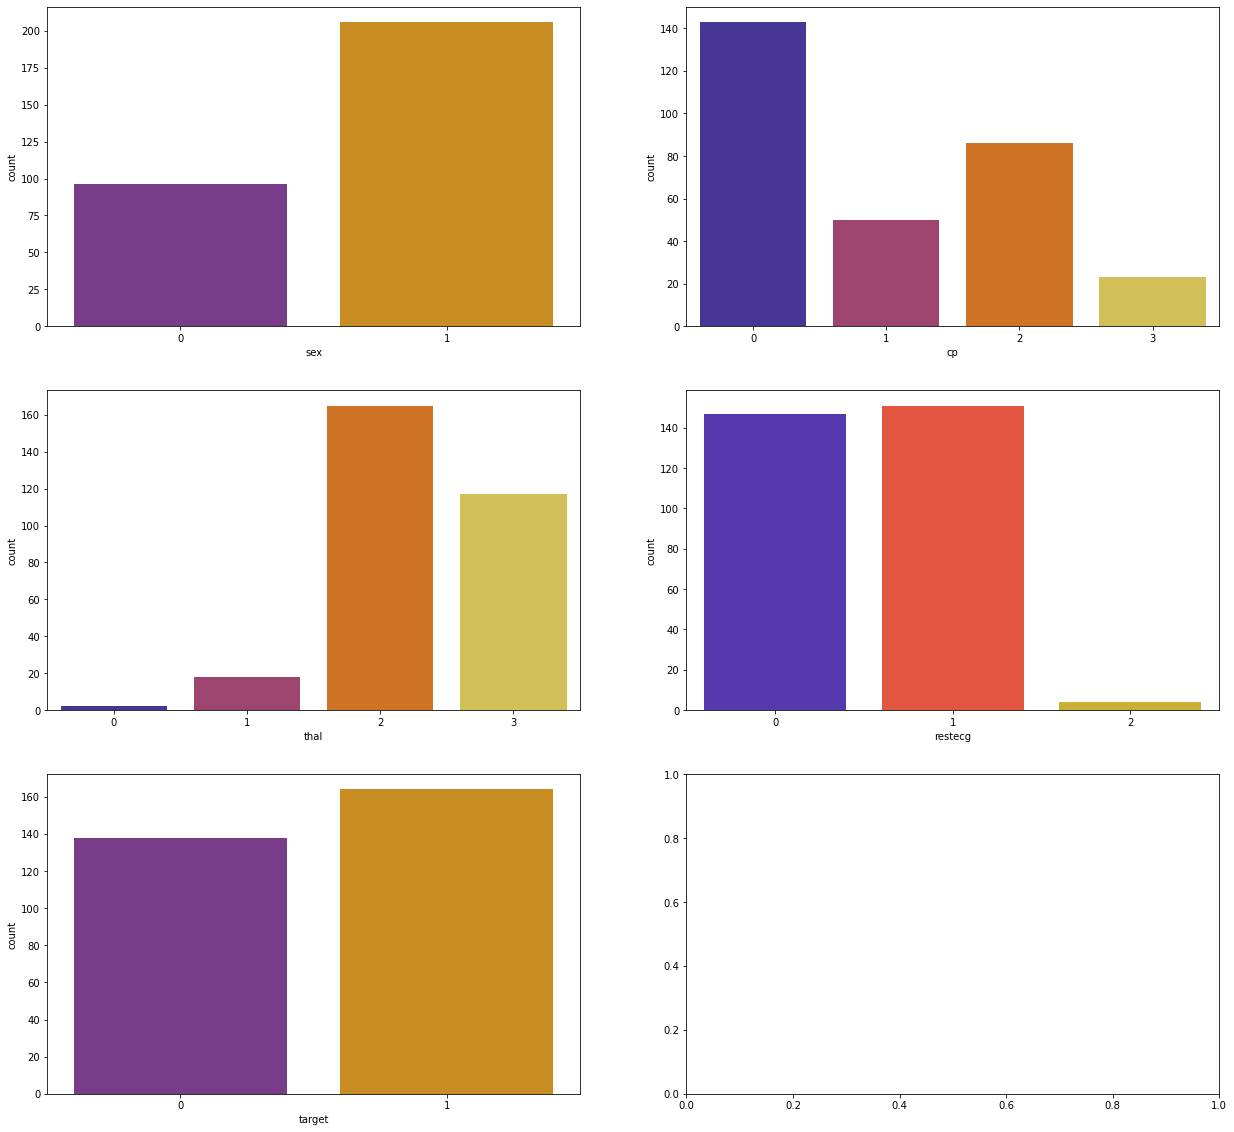

In [14]:
fig,axes = plt.subplots(3,2, figsize=(21,20))

s=sns.countplot('sex',data=newdata,ax=axes[0,0],palette='CMRmap')
c=sns.countplot('cp',data=newdata,ax=axes[0,1],palette='CMRmap')
r=sns.countplot('restecg',data=newdata,ax=axes[1,1],palette='CMRmap')
t=sns.countplot('thal',data=newdata,ax=axes[1,0],palette='CMRmap')
ta=sns.countplot('target',data=newdata,ax=axes[2,0],palette='CMRmap')


## Study the occurrence of CVD across the Age category

In [15]:
newdata[(newdata.age>=45)&(newdata.target==1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1


In [16]:
newdata[(newdata.age>=45)&(newdata.target==0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
## There are 123 such patients whose age is above or equal 45 who are diagnosed with CVD and 
#124 such patients whose age is above or equal 45 and are not diagnosed with cvd 

In [18]:
newdata[(newdata.age<45)&(newdata.target==1)].count()

age         41
sex         41
cp          41
trestbps    41
chol        41
fbs         41
restecg     41
thalach     41
exang       41
oldpeak     41
slope       41
ca          41
thal        41
target      41
dtype: int64

In [19]:
newdata[(newdata.age<45)&(newdata.target==0)].count()

age         14
sex         14
cp          14
trestbps    14
chol        14
fbs         14
restecg     14
thalach     14
exang       14
oldpeak     14
slope       14
ca          14
thal        14
target      14
dtype: int64

In [20]:
## There are 41 such patients whose age is below 45 who are diagnosed with CVD and 
#14 such patients whose age is below 45 and are not diagnosed with cvd 

<AxesSubplot:xlabel='age', ylabel='Count'>

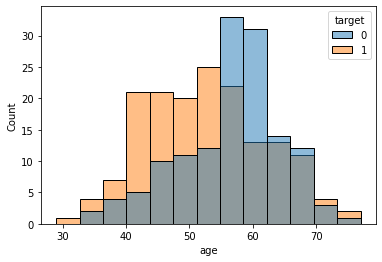

In [21]:
sns.histplot(data=newdata, x='age',hue='target')

## d.	Study the composition of all patients with respect to the Sex category

In [22]:
newdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
newdata[(newdata.sex==1)&(newdata.target==1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1


In [24]:
newdata[(newdata.sex==1)&(newdata.target==0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [25]:
## male patients who are diagnosed with cvd are 92 and the number of male patients who are not diagnosed are 114

In [26]:
newdata[(newdata.sex==0)&(newdata.target==1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1


In [27]:
newdata[(newdata.sex==0)&(newdata.target==0)].count()

age         24
sex         24
cp          24
trestbps    24
chol        24
fbs         24
restecg     24
thalach     24
exang       24
oldpeak     24
slope       24
ca          24
thal        24
target      24
dtype: int64

In [28]:
##there are 72 female patients who are diagnosed with cvd and 24 such pateints who are not

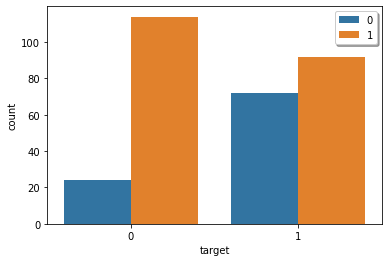

In [34]:

sns.countplot('target', hue='sex',data=newdata)
plt.legend(loc = 0, shadow = True, fontsize = "medium")
plt.show()

## e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [35]:
# anomalies are meant as outliers

<AxesSubplot:xlabel='trestbps'>

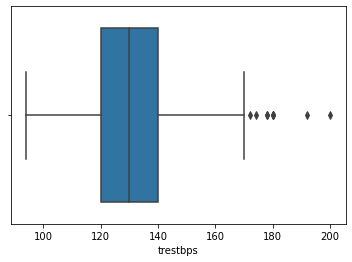

In [36]:
sns.boxplot('trestbps', data=newdata)

In [37]:
newdata[(newdata.trestbps>=170)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [38]:
## there are patients who are diagnosed and who are not diagnosed whose cases have anomalies in trestbps 
## and there relationship cannot be formed 

## f.	Describe the relationship between cholesterol levels and a target variable

In [39]:
newdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


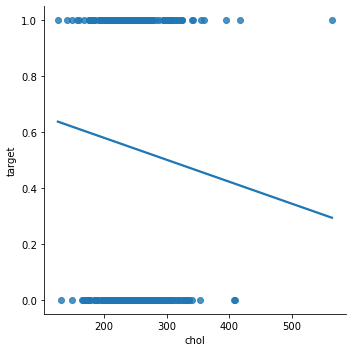

In [40]:
sns.lmplot(x='chol',y='target',data=newdata , ci=None)

## g.	State what relationship exists between peak exercising and the occurrence of a heart attack

In [41]:
# as peak excercising is slope

<AxesSubplot:xlabel='slope', ylabel='target'>

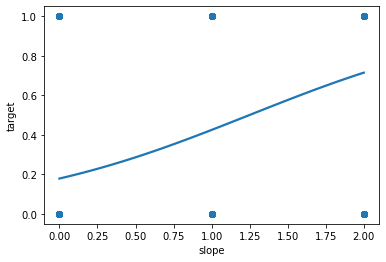

In [42]:
sns.regplot(x='slope',y='target', data=newdata, logistic=True , ci=None)

## h.	Check if thalassemia is a major cause of CVD

<AxesSubplot:xlabel='thal', ylabel='target'>

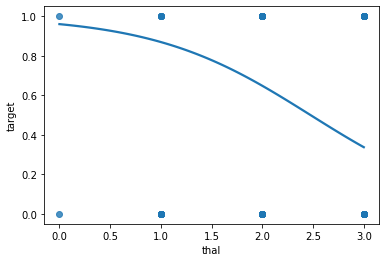

In [43]:
sns.regplot(x='thal',y='target',data=newdata, logistic = True , ci= None)

## 	List how the other factors determine the occurrence of CVD

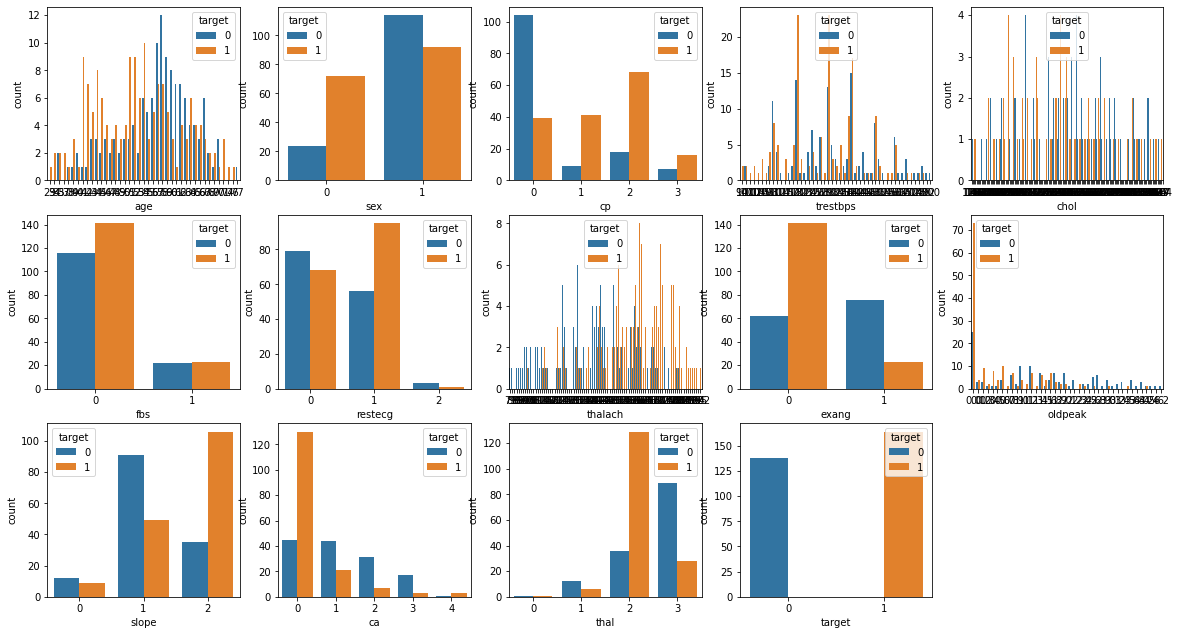

In [44]:
plt.figure(figsize=(20,30))
for i in enumerate(newdata):
    plt.subplot(8,5,i[0]+1)
    sns.countplot(i[1], hue="target", data= newdata)
    
plt.show()

## j.	Use a pair plot to understand the relationship between all the given variables

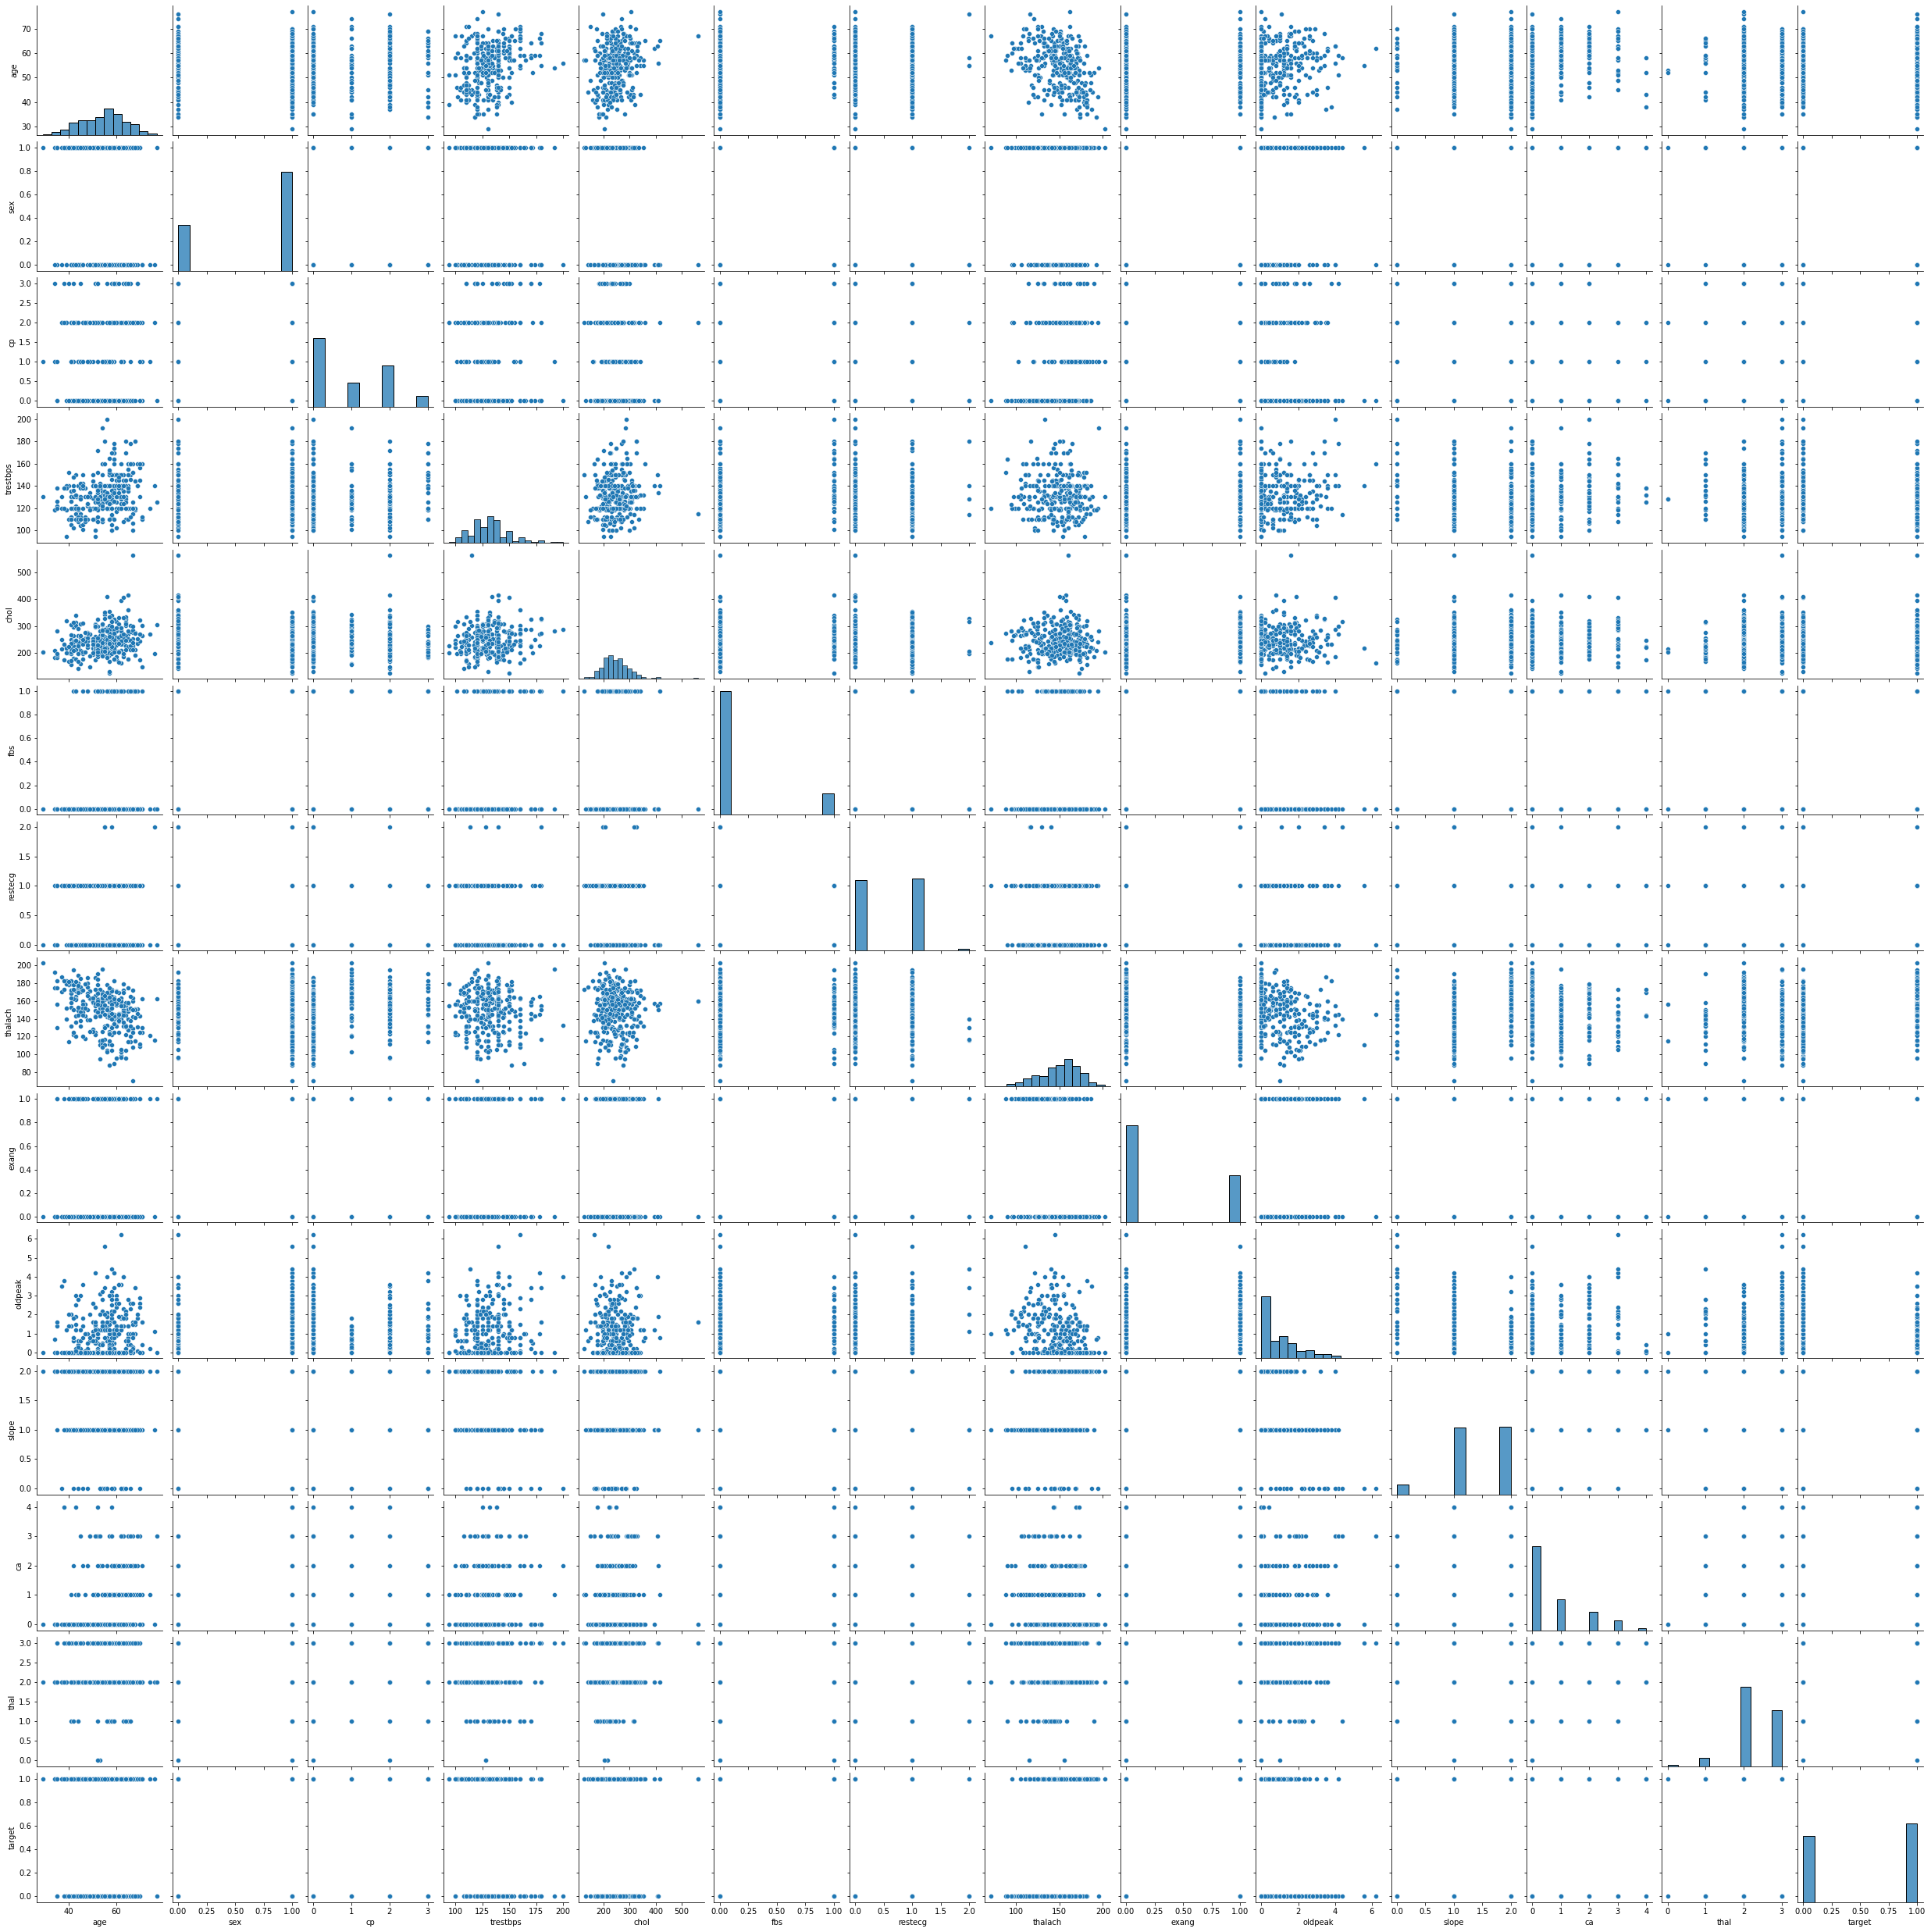

In [45]:
sns.pairplot(data=newdata)

<AxesSubplot:>

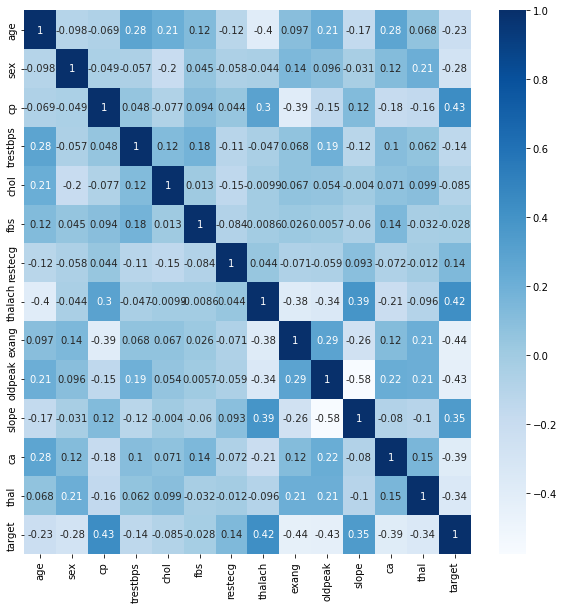

In [46]:
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(), annot= True, cmap='Blues')

## 3.Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score


In [48]:
newdata.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [49]:
features = newdata[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
target = newdata['target']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(features,target, random_state=1)

In [51]:
log_reg = LogisticRegression().fit(X_train,y_train)

In [52]:
my_pred_test = log_reg.predict(X_test)

In [53]:
print("accuracy :" , accuracy_score(y_test, my_pred_test))
print('confusion_matrix:', confusion_matrix(y_test,my_pred_test))

accuracy : 0.8157894736842105
confusion_matrix: [[26 10]
 [ 4 36]]


In [54]:
from sklearn.metrics import classification_report 

In [55]:
print(classification_report(y_test,my_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        36
           1       0.78      0.90      0.84        40

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



## Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
Xtrain,Xtest,ytrain,ytest = train_test_split(features,target,random_state=1)

In [57]:
RFC = RandomForestClassifier().fit(Xtrain,ytrain)

In [58]:
my_randon_pred_test = RFC.predict(Xtest)

In [59]:
print("accuracy:", accuracy_score(ytest,my_randon_pred_test))
print("consufion_matrix:", confusion_matrix(ytest,my_randon_pred_test))

accuracy: 0.7631578947368421
consufion_matrix: [[26 10]
 [ 8 32]]


In [60]:
print(classification_report(ytest,my_randon_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        36
           1       0.76      0.80      0.78        40

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76

